In [154]:
import praw
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,timezone
from tqdm import  tqdm
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### **Loading the data using the reddit API**

In [156]:
# time range 
start = datetime(2025,3,1,tzinfo=timezone.utc)
end = datetime(2025,5,31,23,59,59,tzinfo=timezone.utc)

In [157]:
# connection 

reddit = praw.Reddit(
    client_id="eK7Gid3MOrvEWkCkXqHpVw",
    client_secret="vRj93NZQIDXpR43cX07CeESEcNsg7w",
    user_agent="SentimentBot"
)
subreddits = ["wallstreetbets","stocks","investing","options","ValueInvesting","Finance","pennystocks"]
redit_post = []

for subreddit in subreddits :
    for submission in tqdm(reddit.subreddit(subreddit).search('NVIDIA',limit=1000),desc = f'searcing for data about {subreddit}'):
        post_time = datetime.fromtimestamp(submission.created_utc,tz=timezone.utc)
        
        if start <= post_time <= end :
            redit_post.append({
                'id':submission.id,
            'title' : submission.title,
            'self_text' : submission.selftext,
            'date' : post_time.strftime('%Y-%m-%d'),
            'score' : submission.score,
            'num_comment' : submission.num_comments,
            'author' : str(submission.author),
            'subreddit' : str(submission.subreddit),
            'url' : submission.url})
data = pd.DataFrame(redit_post)
data.head()


searcing for data about wallstreetbets: 240it [00:04, 58.31it/s]
searcing for data about stocks: 226it [00:04, 54.28it/s]
searcing for data about investing: 234it [00:03, 61.55it/s]
searcing for data about options: 242it [00:04, 57.76it/s]
searcing for data about ValueInvesting: 237it [00:03, 75.18it/s]
searcing for data about Finance: 3it [00:00, 11.26it/s]
searcing for data about pennystocks: 167it [00:03, 46.81it/s]


,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1303,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,https://preview.redd.it/iemihvrce9qe1.png?widt...,2025-03-22,2536,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia ([NVDA](https://finance.yahoo.com/quote...,2025-05-26,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell? 🤔,2025-05-27,42,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12474,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


### **Data cleaning** 

##### after getting the data we need to clean the self_text from any links , markdown ...... for the analysis purpose

In [ ]:
data.head(5)

<bound method NDFrame.head of           id                                              title  \
0    1kxrhap     Nvidia earnings are out – here are the numbers   
1    1jhaxzj  Took my Nvidia gains after 3 years of holding ...   
2    1kvuqnj                     NVIDIA Artificial Intelligence   
3    1kx0udl                                        50k on NVDA   
4    1k03vah  Nvidia tanking after hours due to China export...   
..       ...                                                ...   
206  1jfs1v3  $RR: Richtech Robotics and Ghost Kitchens Anno...   
207  1jlgglm                          The Glimpse Group ($VRAR)   
208  1j8n51q  $IB.V (IBC Advanced Alloys) – Undervalued Penn...   
209  1jiqegn  $VCIG: VCI Global Expands AI Footprint with US...   
210  1j23obw                                 $FCCN on the rise!   

                                             self_text        date  score  \
0                                                       2025-05-28   1303   
1    https:

In [159]:
data.shape

(211, 9)

In [160]:
data.dtypes

id             object
title          object
self_text      object
date           object
score           int64
num_comment     int64
author         object
subreddit      object
url            object
dtype: object

##### first we sort the data by the dates in order to keep the sync of the dates 

In [161]:
data['date'] = pd.to_datetime(data['date'])

In [162]:
data.sort_values(by='date',ascending=True,inplace=True)
data.sort_index(inplace=True)

In [163]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1303,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,https://preview.redd.it/iemihvrce9qe1.png?widt...,2025-03-22,2536,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia ([NVDA](https://finance.yahoo.com/quote...,2025-05-26,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell? 🤔,2025-05-27,42,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12474,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


In [164]:
from pprint import pprint
text = data['self_text'][2]
pprint(text)

('Nvidia ([NVDA](https://finance.yahoo.com/quote/NVDA)) has outperformed every '
 'stock in the S&P 500 ([\\^GSPC](https://finance.yahoo.com/quote/%5EGSPC)) '
 'since\xa0[the launch of ChatGPT\xa0'
 '](https://finance.yahoo.com/news/how-chatgpt-changed-the-world-of-tech-in-just-one-year-180957543.html)in '
 'late November 2022 Shares in the chipmaker have risen nearly 700% since '
 'ChatGPT brought the power of artificial intelligence to the masses, far '
 "outpacing the S&P 500's roughly 45% over the same time period. The next "
 'closest gain for an S&P 500 company in that time period is a 540% pop for '
 'Vistra Corp ([VST](https://finance.yahoo.com/quote/VST)).Nvidia has '
 'established itself as the key provider of chips needed to operate AI '
 'systems. Now at the epicenter of an AI arms race, Nvidia has established '
 'itself as[\xa0a cornerstone of the recent bull '
 'market](https://finance.yahoo.com/news/live/stock-market-today-tech-leads-stocks-higher-as-nvidia-surges-to-rec

In [165]:
import re 
def clean_text(text):
    # Remove markdown links 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    
    # Remove stray markdown artifacts 
    text = re.sub(r'\[\]|\(\)', '', text)
    
    # Replace \xa0 (non-breaking space) and \n (newlines) with space
    text = text.replace('\xa0', ' ').replace('\n', ' ')
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # strip leading/trailing whitespace
    return text.strip()


In [166]:
data['self_text'] =  data['self_text'].apply(lambda x : clean_text(x))

In [167]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1303,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2536,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell,2025-05-27,42,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12474,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


In [168]:
data['self_text'][0]

''

In [169]:
data['self_text'].apply(lambda x: pd.isna(x) or x.strip() == '')

0       True
1      False
2      False
3      False
4       True
       ...  
206    False
207    False
208    False
209    False
210    False
Name: self_text, Length: 211, dtype: bool

In [170]:
import numpy as np

In [171]:
data['self_text'].apply(lambda x:  np.nan if x.strip() == '' else x)

0                                                    NaN
1      Life happened Needed the funds The shares were...
2      Nvidia NVDA has outperformed every stock in th...
3                What covered call strikes should I sell
4                                                    NaN
                             ...                        
206    RR News Richtech Robotics Nasdaq RR has announ...
207    VRAR Top tier customers NVDA WMT MSFT the US N...
208    Hey rpennystocks a first post about IBC Advanc...
209    VCIG  News VCI Global NASDAQ VCIG has secured ...
210    Good afternoon my fellow pennystock aficionado...
Name: self_text, Length: 211, dtype: object

In [172]:
data.dropna(axis=1,inplace=True)

In [173]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1303,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2536,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell,2025-05-27,42,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12474,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


#####  Now after cleaning the data we need to access the score of the posts bc we assume that a higher score means hight unfluence so wz will set the threshold to 100 

In [174]:
for col in ['score','num_comment']:
    data[col] = data[col].astype(int)

In [175]:
data.dtypes

id                     object
title                  object
self_text              object
date           datetime64[ns]
score                   int32
num_comment             int32
author                 object
subreddit              object
url                    object
dtype: object

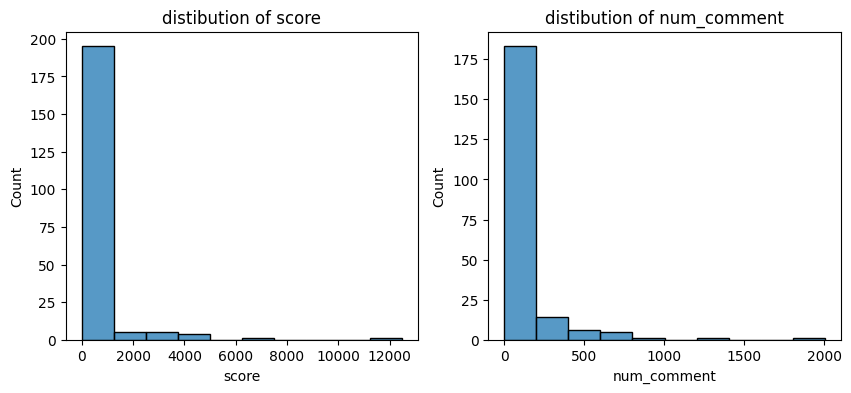

In [176]:
fig , ax = plt.subplots(1,2,figsize=(10,4))
ax = ax.flatten()
for i , col in  enumerate(['score','num_comment']):
    sns.histplot(data, x = col , ax=ax[i],bins=10)
    ax[i].set_title(f'distibution of {col}')

In [177]:
# posts with low score
len(data.loc[data["score"] < 100]) - len(data)

-69

In [178]:
data = data[data["score"] > 100 ]

In [179]:
data.score.min()

104

### **applying the sentiment analysis model finberta** 

-**FinRoBERTa (based on RoBERTa)**

* 1-Better performance and deeper context understanding in some use cases.

* 2-From: yiyanghkust/finbert-tone or you can look into models like mrm8488/bert-tiny-finetuned-financial-news-sentiment.

In [180]:
from transformers import  AutoTokenizer , AutoModelForSequenceClassification,pipeline


model_name = "ProsusAI/finbert"

# we load the tokenizer and the model 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# creating a pipeline that merges all the the process

nlp = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,truncation=True)

##### testing the pipeline 

In [181]:
text = "the CEO is passaway  and the  board is looking a new chairman to replace it this will cause some instabilities on the stock market"
sentiment = nlp(text)[0]

In [182]:
def get_sentiment(text):
    result = nlp(text)[0]
    return result['label'],result['score']

data[['sentiment','sentiment_score']] = data['self_text'].apply(lambda x : get_sentiment(x)).apply(pd.Series)

In [183]:
data['sentiment'].value_counts()

sentiment
neutral     47
negative    17
positive     5
Name: count, dtype: int64

In [184]:
import yfinance as yf

df = yf.download('NVDA',start="2025-3-1",end="2025-5-31" )
data

[*********************100%***********************]  1 of 1 completed


,id,title,self_text,date,score,num_comment,author,subreddit,url,sentiment,sentiment_score
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1303,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...,neutral,0.424185
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2536,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,neutral,0.863899
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj,neutral,0.581886
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12474,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg,neutral,0.424185
5,1jz0o1p,Nvidia commits $500 billion to AI infrastructu...,,2025-04-14,4205,512,PregnancyTestsByShaq,wallstreetbets,https://finance.yahoo.com/news/nvidia-commits-...,neutral,0.424185
...,...,...,...,...,...,...,...,...,...,...,...
149,1kez2cr,PLTR: The Most Overvalued Stock in History,While everyones focused on Nvidia as the most ...,2025-05-05,260,91,theycallmeryan,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.885238
151,1j521ug,AAPL is the second most expensive Mag 7 behind...,Not one to ever care about the MAG 7 or the us...,2025-03-06,104,153,DylanIE_,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.825782
153,1jisozt,Microsoft (MSFT) Will be my favorite single st...,I absolutely love the outlook of microsoft and...,2025-03-24,195,81,ecarroll1851,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.925750
155,1kuy9f2,"To the user claiming ""Gemini has inflated numb...",Another user wrote a post about why they were ...,2025-05-25,260,46,fatasspenguino,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.872645


In [185]:
df.columns =df.columns.droplevel(1)

In [186]:
import plotly.graph_objects as go

In [187]:
data.set_index('date',inplace=True)

In [188]:
data.sort_index(inplace=True)

In [189]:
data

,id,title,self_text,score,num_comment,author,subreddit,url,sentiment,sentiment_score
date,,,,,,,,,,
2025-03-03,1j2gkxl,Exclusive-Nvidia and Broadcom testing chips on...,,422,86,uznemirex,wallstreetbets,https://www.reuters.com/technology/nvidia-broa...,neutral,0.424185
2025-03-03,1j2cvns,If a market crash like 2022 happens again and ...,We cant be sure whether were at the beginning ...,229,283,Andy_parker,investing,https://www.reddit.com/r/investing/comments/1j...,neutral,0.767903
2025-03-03,1j2sr89,Nvidia reached dropped below it’s 13w low today,,257,177,HxrrySZN,wallstreetbets,https://i.redd.it/8560uvdpcjme1.jpeg,neutral,0.424185
2025-03-03,1j2pw97,Nvidia warns of growing competition from China...,,107,22,Whole-Albatross-6155,ValueInvesting,https://www.cnbc.com/2025/02/27/nvidia-warns-o...,neutral,0.424185
2025-03-04,1j3az7v,If you can't stomach a 4% market drop then you...,It seems that everyone has become so accustome...,3095,630,leafs2121,investing,https://www.reddit.com/r/investing/comments/1j...,negative,0.582050
...,...,...,...,...,...,...,...,...,...,...
2025-05-25,1kuy9f2,"To the user claiming ""Gemini has inflated numb...",Another user wrote a post about why they were ...,260,46,fatasspenguino,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.872645
2025-05-26,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,256,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj,neutral,0.581886
2025-05-28,1kxb4mg,Why isn’t AMD getting any love for AI stocks w...,Hey yall Lets be realwhen it comes to AIready ...,236,216,Red-candy5577,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.887099


In [190]:
data.loc[data['sentiment']=='negative','sentiment_score'] = data.loc[data['sentiment']=='negative','sentiment_score'] * -1

In [191]:
data['reinforced_sentiment'] = data['sentiment_score'] * data['score']

In [192]:
sentiment_evolution = data.groupby(data.index)['reinforced_sentiment'].mean().reset_index()

In [193]:
sentiment_evolution

,date,reinforced_sentiment
0,2025-03-03,127.314802
1,2025-03-04,-466.416040
2,2025-03-06,-178.839853
3,2025-03-09,103.625580
4,2025-03-10,5051.444347
5,2025-03-12,-1254.232060
6,2025-03-13,1834.870637
7,2025-03-18,171.371229
8,2025-03-20,1097.940526
9,2025-03-21,-533.271287


In [195]:
df['date'] = df.index

In [196]:
df_1 = pd.merge(sentiment_evolution,df[['Close','date']],on='date',how='left')

In [197]:
df_1.isna().sum()

date                    0
reinforced_sentiment    0
Close                   9
dtype: int64

In [198]:
df_1.dropna(axis=0,inplace=True)

In [ ]:
fig = go.Figure()

# Closing Price (right y-axis #1)
fig.add_trace(go.Scatter(
    x=df_1['date'],
    y=df_1['Close'],
    mode='lines+markers',
    yaxis='y2',
    name='Closing price on the NVDA stocks',
    line=dict(color='green')
))

# Reinforced Sentiment (left y-axis)
fig.add_trace(go.Scatter(
    x=df_1['date'],
    y=df_1['reinforced_sentiment'],
    mode='lines+markers',
    yaxis='y1',
    name='Sentiment',
    line=dict(color='blue')
))



fig.update_layout(
    title='Reinforced Sentiment and Closing Price evolution',
    yaxis=dict(
        title='Reinforced Sentiment',
        side='left'  
    ),
    
    yaxis2=dict(
        title='Closing Price',

        anchor='x',
        overlaying='y',
        side='right',
        position=0.85
    ),
    
    legend=dict(x=0.1, y=1.1, orientation='h'),
    margin=dict(l=60, r=120, t=80)
)

fig.show()


In [200]:
corr = df_1[['reinforced_sentiment','Close']].corr()

In [201]:
fig = go.Figure(data=go.Heatmap(
                z=corr.values,
                x = corr.columns,
                y= corr.index,
                colorscale='Blues',
))
fig.show()